# **`sns.PairGrid()` 详解**  
`PairGrid` 是 Seaborn 中的一个高级接口，用于绘制**成对关系矩阵**（Pairwise Relationships Grid）。它允许我们在一个网格中可视化数据集中多个变量之间的两两关系，适用于探索性数据分析（EDA）。  

## **1. `PairGrid` 的基本结构**
`PairGrid` 生成的是一个对称的矩阵网格，其中：
- **行和列**代表数据集中的**数值变量**（如 `bill_length_mm`, `bill_depth_mm` 等）。
- **对角线**（`i == j`）通常用于显示**单变量的分布**（如直方图、KDE 图）。
- **非对角线**（`i != j`）用于显示**两个变量之间的关系**（如散点图、回归图、KDE 图等）。

### **示例网格结构（假设有 3 个变量 `X, Y, Z`）**
|       | **X**       | **Y**       | **Z**       |
|-------|-------------|-------------|-------------|
| **X** | `X` 的分布  | `X vs Y`    | `X vs Z`    |
| **Y** | `Y vs X`    | `Y` 的分布  | `Y vs Z`    |
| **Z** | `Z vs X`    | `Z vs Y`    | `Z` 的分布  |

- **上三角**（`i < j`）：如 `X vs Y`（右上部分）
- **下三角**（`i > j`）：如 `Y vs X`（左下部分）
- **对角线**（`i = j`）：如 `X` 的分布

## **2. `PairGrid` 的核心参数**
### **`sns.PairGrid(data, vars=None, hue=None, hue_order=None, palette=None, ...)`**
| 参数 | 说明 |
|------|------|
| `data` | 输入数据（DataFrame 或结构化数组） |
| `vars` | 指定要使用的变量（列名列表），默认使用所有数值列 |
| `hue` | 分组变量（分类变量），用于按不同颜色绘制 |
| `hue_order` | 指定 `hue` 类别的顺序 |
| `palette` | 颜色调色板 |
| `corner` | 如果 `True`，只绘制下三角（避免重复） |
| `diag_sharey` | 对角线子图是否共享 y 轴（默认 `True`） |
| `height` | 每个子图的高度（英寸） |
| `aspect` | 子图的宽高比 |

## **3. 填充网格的方法**
`PairGrid` 本身不绘制图形，需要使用以下方法填充：
| 方法 | 说明 |
|------|------|
| `.map_upper(func, **kwargs)` | 填充上三角（`i < j`） |
| `.map_lower(func, **kwargs)` | 填充下三角（`i > j`） |
| `.map_diag(func, **kwargs)` | 填充对角线（`i = j`） |
| `.map_offdiag(func, **kwargs)` | 填充所有非对角线（`i != j`） |

**常用绘图函数**：
- `sns.scatterplot`（散点图）
- `sns.kdeplot`（核密度估计图）
- `sns.histplot`（直方图）
- `sns.regplot`（回归图）
- `sns.hexbinplot`（六边形分箱图）

## **4. 示例解析**
### **示例代码**
```python
import seaborn as sns
sns.set_theme(style="white")  # 设置白色主题

df = sns.load_dataset("penguins")  # 加载企鹅数据集

# 创建 PairGrid，对角线不共享 y 轴
g = sns.PairGrid(df, diag_sharey=False)

# 填充网格
g.map_upper(sns.scatterplot, s=15)  # 上三角：散点图（点大小=15）
g.map_lower(sns.kdeplot)            # 下三角：KDE 图
g.map_diag(sns.kdeplot, lw=2)       # 对角线：KDE 图（线宽=2）
```
### **输出效果**
- **上三角**（右上部分）：散点图（`sns.scatterplot`），展示变量间的线性关系。
- **下三角**（左下部分）：KDE 图（`sns.kdeplot`），展示变量间的联合分布。
- **对角线**：KDE 图（`sns.kdeplot`），展示单变量的分布。

## **5. 进阶用法**
### **(1) 使用 `hue` 分组**
```python
g = sns.PairGrid(df, hue="species")  # 按企鹅种类分组
g.map_upper(sns.scatterplot, s=10)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
g.add_legend()  # 添加图例
```
- 不同颜色代表不同 `species`（如 Adelie、Gentoo、Chinstrap）。

### **(2) 只绘制下三角（避免重复）**
```python
g = sns.PairGrid(df, corner=True)  # 只绘制下三角
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
```

### **(3) 混合不同图形**
```python
g = sns.PairGrid(df)
g.map_upper(sns.regplot, scatter_kws={"s": 10})  # 上三角：回归线
g.map_lower(sns.kdeplot, cmap="Blues")           # 下三角：蓝色 KDE
g.map_diag(sns.histplot, kde=True)               # 对角线：直方图+KDE
```

## **6. `PairGrid` vs `pairplot`**
Seaborn 还提供了 `sns.pairplot`，它是 `PairGrid` 的简化版：
|  | `PairGrid` | `pairplot` |
|---|---|---|
| **灵活性** | 高（可自定义每个子图） | 低（默认统一图形） |
| **代码量** | 较多 | 较少 |
| **适用场景** | 需要精细控制图形 | 快速探索数据 |

### **`pairplot` 示例**
```python
sns.pairplot(df, hue="species", kind="scatter", diag_kind="kde")
```

## **7. 总结**
- `PairGrid` 适用于**高度定制化的多变量关系可视化**。
- 可以分别控制**上三角、下三角、对角线**的图形。
- 支持**分组（`hue`）**，便于比较不同类别。
- 适用于**探索数据分布、相关性、异常值**等。

如果你只是想快速查看数据关系，可以用 `sns.pairplot`；如果需要更精细的控制，就用 `sns.PairGrid`。

In [5]:
import pandas as pd
import seaborn as sns

这段代码使用了Seaborn库来创建一个PairGrid图形，用于可视化企鹅数据集中的变量关系。

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
117,Adelie,Torgersen,37.3,20.5,199.0,3775.0,MALE
245,Gentoo,Biscoe,46.1,15.1,215.0,5100.0,MALE
86,Adelie,Dream,36.3,19.5,190.0,3800.0,MALE
74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,FEMALE
163,Chinstrap,Dream,51.7,20.3,194.0,3775.0,MALE
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,MALE
91,Adelie,Dream,41.1,18.1,205.0,4300.0,MALE
277,Gentoo,Biscoe,45.5,15.0,220.0,5000.0,MALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


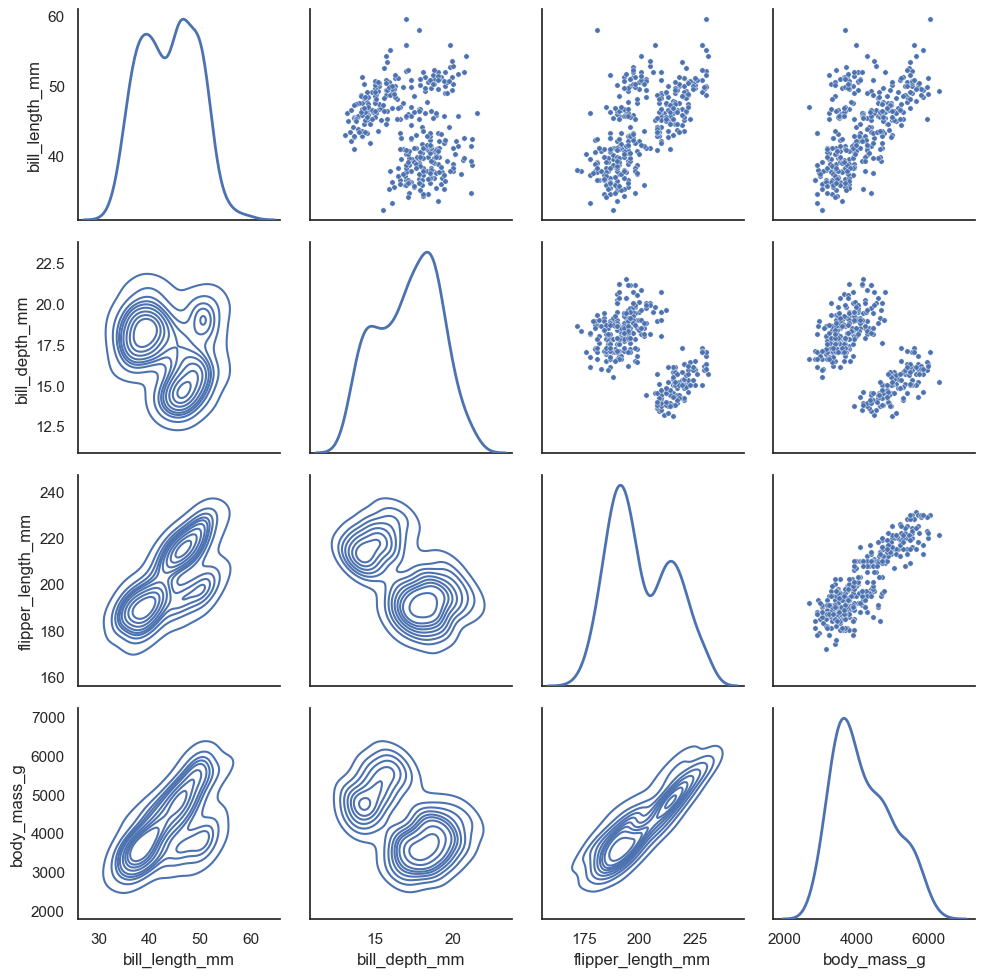

In [9]:
sns.set_theme(style="white")
penguins = pd.read_csv("seaborn-data/penguins.csv")
display(penguins.sample(10))

# 创建一个PairGrid对象，这是一个网格，用于绘制数据集中多个变量之间的成对关系。
# diag_sharey=False: 指定对角线上的子图不共享y轴刻度。这意味着每个对角线子图（显示单变量分布）可以有自己的y轴范围。
g = sns.PairGrid(penguins, diag_sharey=False)

# 填充网格的上三角、下三角和对角线
g.map_upper(sns.scatterplot, s=15)  # 在网格的上三角部分（即变量对的右上部分）绘制散点图。
g.map_lower(sns.kdeplot)            # 在网格的下三角部分（即变量对的左下部分）绘制核密度估计图（KDE）
g.map_diag(sns.kdeplot, lw=2)       # 在对角线上绘制核密度估计图（KDE），显示单变量的分布。

这段代码使用 Seaborn 创建了一个 PairGrid 来可视化泰坦尼克号数据集（titanic）中不同变量与生存率（survived）之间的关系。

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
569,1,3,male,32.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,yes,True
549,1,2,male,8.0,1,1,36.7500,S,Second,child,False,NaN,Southampton,yes,False
671,0,1,male,31.0,1,0,52.0000,S,First,man,True,B,Southampton,no,False
834,0,3,male,18.0,0,0,8.3000,S,Third,man,True,NaN,Southampton,no,True
430,1,1,male,28.0,0,0,26.5500,S,First,man,True,C,Southampton,yes,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
833,0,3,male,23.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False
67,0,3,male,19.0,0,0,8.1583,S,Third,man,True,NaN,Southampton,no,True


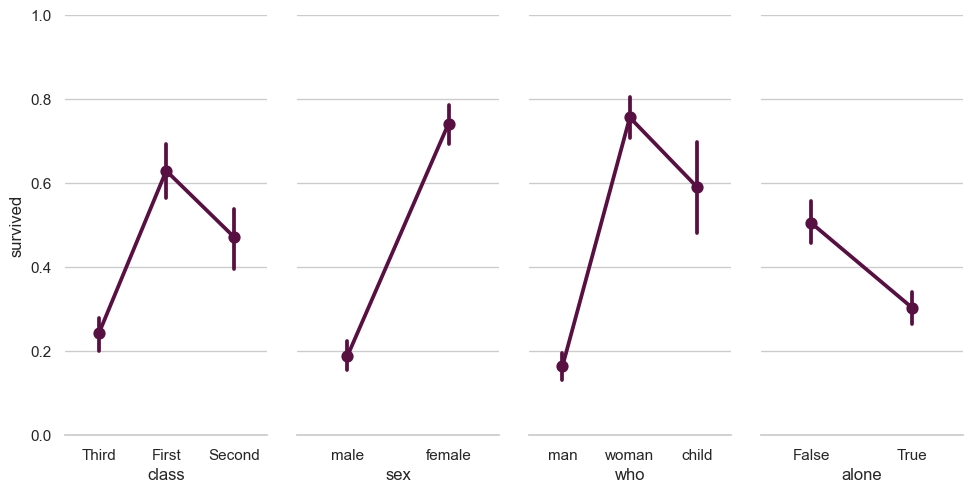

In [11]:
sns.set_theme(style="whitegrid")
# 加载 Seaborn 内置的 泰坦尼克号数据集：
#     包含乘客信息（如 survived、pclass、sex、age、fare 等）
#     survived 是二分类变量（0=未幸存，1=幸存）
titanic = pd.read_csv("seaborn-data/titanic.csv")
display(titanic.sample(10))

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(
    titanic,
    y_vars="survived",  # y 轴变量（生存率）
    x_vars=["class", "sex", "who", "alone"],  # x 轴变量
    height=5,  # 每个子图的高度（英寸）
    aspect=.5,  # 子图的宽高比（width = height * aspect）
)

# 在每个子图上绘制 pointplot（点图）
# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

这段代码使用 Seaborn 的 PairGrid 创建了一个水平点图（dot plot），用于可视化美国各州（abbrev）在不同类型车祸（如 total、speeding、alcohol 等）中的发生情况。

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
35,14.1,3.948,4.794,13.959,11.562,697.73,133.52,OH
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
45,13.6,4.080,4.080,13.056,12.920,716.20,109.61,VT
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
33,16.8,6.552,5.208,15.792,13.608,708.24,127.82,NC
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
28,14.7,5.439,4.704,13.965,14.553,1029.87,138.71,NV
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO


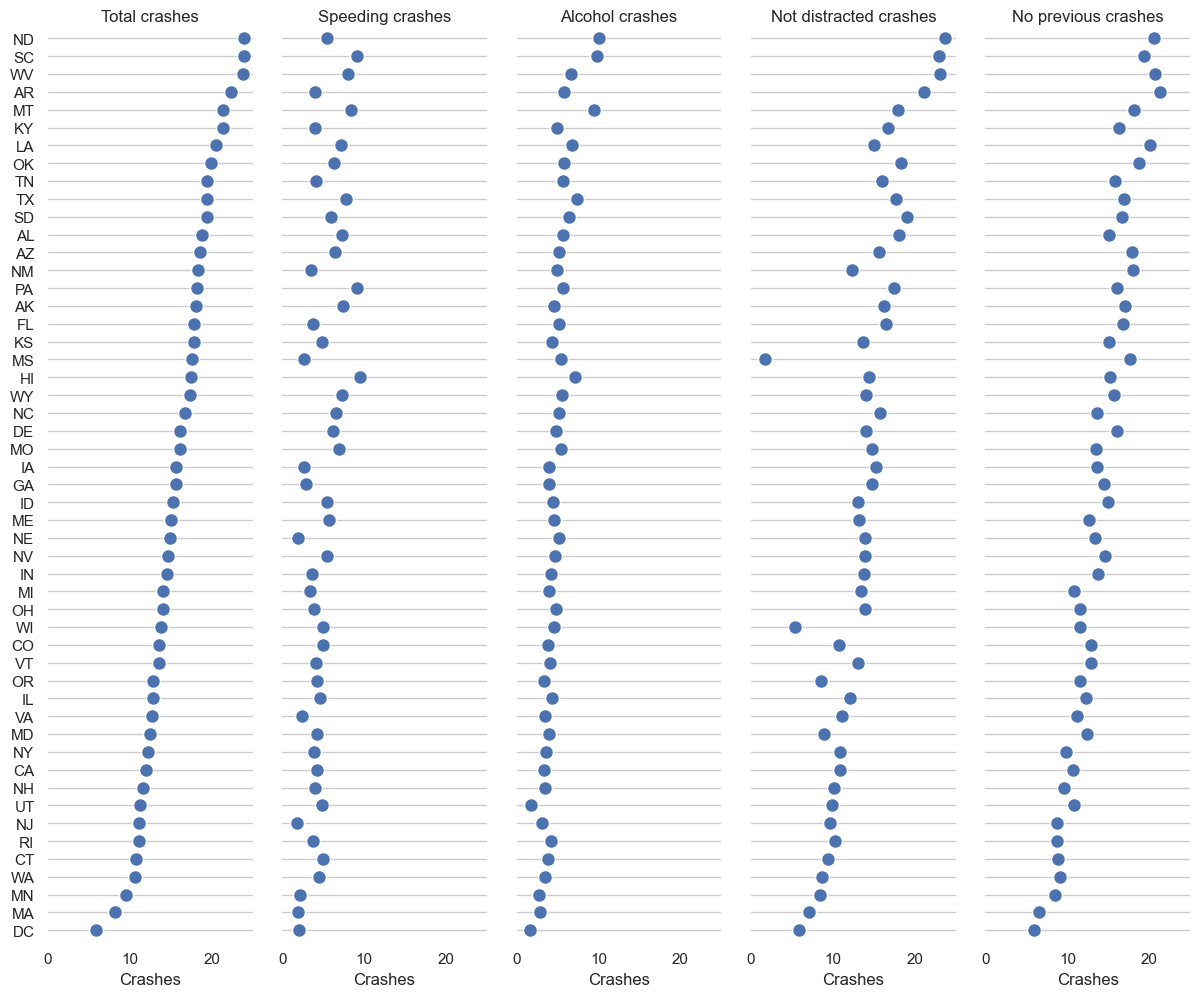

In [14]:
sns.set_theme(style="whitegrid")
crashes = pd.read_csv("seaborn-data/car_crashes.csv")
display(crashes.sample(10))

# Make the PairGrid
g = sns.PairGrid(
    crashes.sort_values("total", ascending=False),  # 按 total（总车祸数）降序排列，使图形从上到下显示车祸最多的州。
    x_vars=crashes.columns[:-3],  # 使用除最后 3 列外的所有列作为 x 轴变量
    y_vars=["abbrev"],  # y 轴变量（州缩写）
    height=10,  # 图形高度（英寸）
    aspect=.25,  # 宽高比（width = height * aspect）
)

# Draw a dot plot using the stripplot function
g.map(
    sns.stripplot,  # 使用 stripplot（点图）
    size=10,  # 点的大小
    orient="h",  # 水平方向（horizontal）
    jitter=False,  # 禁用抖动（避免点重叠时随机偏移）
    palette="flare_r",  # 颜色映射（从深到浅的渐变色）
    linewidth=1,  # 点边框宽度
    edgecolor="w",  # 点边框颜色（白色）
)

# xlim=(0, 25)：统一所有子图的 x 轴范围 为 [0, 25]（假设车祸数不超过 25）。
# xlabel="Crashes"：设置 x 轴标签为 "Crashes"。
# ylabel=""：移除 y 轴标签（因为州名已经显示在 y 轴）。
# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
# # 设置子图标题和网格
titles = [
    "Total crashes",            # 总车祸数
    "Speeding crashes",         # 超速导致的车祸数
    "Alcohol crashes",          # 酒驾导致的车祸数
    "Not distracted crashes",   # 非分心驾驶导致的车祸数
    "No previous crashes"       # 无历史违规记录的车祸数
]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)     # 为每个子图设置标题
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)    # 关闭 x 轴网格线（避免干扰点图）
    ax.yaxis.grid(True)     # 开启 y 轴网格线（便于对齐州名）

sns.despine(left=True, bottom=True)